In [92]:
#Import the Libraries

import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [93]:
# Import the dataset

dataset = pd.read_csv("dataset.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [94]:
# clean up column names
dataset.columns = dataset.columns.\
    str.strip().\
    str.lower()

# remove non-numeric columns
dataset = dataset.select_dtypes(['number']) 

dataset.head()

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [95]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])

dataset.head()


,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [96]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size = 0.4, random_state=1, shuffle=True)
train.head()

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
870,49,10,NaN,15,6,8,1122,15,11,702,1122,15,0.0,0
516,40,9,7942.0,8,0,2,1016,12,14,1612,1324,12,4.0,0
1444,75,14,4721.0,4,3,2,432,4,6,372,432,4,0.0,0
1700,114,19,NaN,15,4,7,1062,15,11,702,1062,15,0.0,0
685,44,9,NaN,6,0,1,672,8,8,1381,834,8,2.0,0


In [97]:
test.head()

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
1308,66,12,251.0,11,1,7,1012,15,15,1806,1316,15,4.0,0
650,43,8,324.0,25,2,6,2444,31,17,1984,2874,31,6.0,0
302,35,9,NaN,44,40,6,6945,56,51,26115,7849,56,12.0,0
108,28,7,NaN,6,4,3,552,6,8,612,552,6,0.0,0
1289,65,12,NaN,0,0,0,0,0,0,0,0,0,0.0,0


In [102]:
# Training XGBoost on the Training set

X_train = train.drop(["type"], axis=1)
Y_train= train["type"]


# fit our model
from xgboost import XGBClassifier
Classifier = xgb.XGBClassifier(tree_method = "gpu_exact")
Classifier.fit(y=Y_train, X=X_train)


XGBClassifier(tree_method='gpu_exact')

In [103]:
# split testing data into inputs & output
X_test = test.drop(["type"], axis=1)
Y_test = test["type"]

# predictions & actual values, from test set
predict = Classifier.predict(X_test) > 0
actual = Y_test

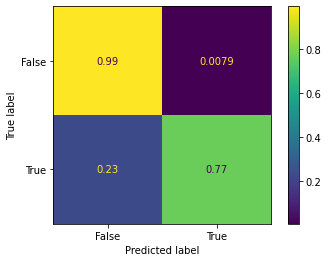

accuracy score : 0.9663394109396914


In [104]:
# plot confusion matrix 

from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(actual, predict, normalize='true')

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

accuracy_score = accuracy_score(Y_test, predict)
print (f"accuracy score : {accuracy_score}")

In [105]:
# Applying k-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.88 %
Standard Deviation: 1.69 %
